<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
    * Otro..
* Implementación de Perceptrón y variantes.
* Implementación de método aprendizaje online (Gradiente descendente).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Perceptrón a mano

<img src="https://miro.medium.com/max/1838/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="40%"  />

En esta sección se le pedirá que implemente el algoritmo online del *perceptrón* [[2]](#refs) para aprender una función de separación lineal en un problema de clasificación binaria (0 o 1) a través de la función de *treshold*. Un algoritmo online, como el caso del *perceptrón*, aprende de una instancia de dato a la vez $(x^{(i)},y^{(i)})$, dentro de un conjunto de datos $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(N)},y^{(N)})  \}$, donde la predicción de la clase para cada instancia es través de la función de *treshold*:

$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \ \sum_j w_j \cdot x^{(i)}_j +b \geq \theta \\
       0 &  si \ \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$


Donde $\theta = 0$. Recordar que el *bias* $b$ se puede incluir dentro de los pesos/parámetros $w$ si se agrega una columna extra de 1's a los datos de entrada $x$ (*como se ve en la imagen anterior*). 

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

In [1]:
#Importación de todas las librerías
from time import time
import numpy as np
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

In [2]:
#Función que calcula el output del modelo f. Se incluyen los bias dentro de w.
def f(xi, w):
    if(np.dot(w, xi) >= 0):
        return 1
    return 0

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.



In [3]:
def perceptron(x, y, n, N):
    init_time = time()
    w = np.zeros(x[0].size)
    acc_arr = []
    mistakes = True
    
    while(mistakes):
        mistakes = False
        correct = 0
        
        for i in range(N):            
            if y[i] != f(x[i], w):
                
                #Como en la definición del algoritmo los valores de y son 0 y 1, se debe hacer un ajuste.
                y_i = 1
                if(y[i] == 0):
                    y_i = -1
                
                w = (w + n * y_i * x[i]).T
                mistakes = True 
                
            else:
                correct += 1 
            
            acc_arr.append(correct/(i+1))
            
        #Comentar break para ejecución completa    
        break  
    end_time = time()
    print("Tiempo:", end_time - init_time, "[s]")
    return acc_arr

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
```
Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

In [4]:
X_train,y_train = load_breast_cancer(return_X_y=True) 
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_train = np.c_[X_train, np.ones(len(X_train)) ] #add columns of 1's if you want

accuracies = perceptron(X_train, y_train, 0.3, len(X_train))

Tiempo: 0.0010249614715576172 [s]


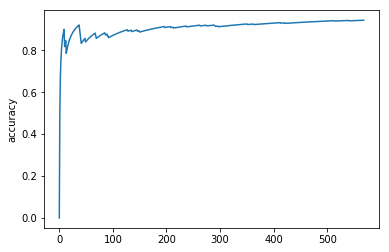

In [5]:
plt.plot(accuracies)
plt.ylabel('accuracy')
plt.show()

Se observa que el perceptrón se puede adaptar a un problema real de clasificación. En este caso se ve que la exactitud mejora a medida que pasa cada iteración, por lo que el algoritmo es efectivo (se reducen los errores). Por otra parte, el tiempo de ejecución fue de aproximadamente 0.001 segundos.

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

In [6]:
#Basado en paper del Forgetrón
#https://papers.nips.cc/paper/2806-the-forgetron-a-kernel-based-perceptron-on-a-fixed-budget.pdf
def psi(sigma, phi, mu):
    return (sigma * phi)**2 + 2 * sigma * phi * (1 - phi * mu)

def muu_t(x, y, f, rt, t):
    y_rt = 1
    if y[rt] == 0:
        y_rt = -1
        
    y_t = 1
    if y[t] == 0:
        y_t = -1
        
    return y_rt * (f + y_t * np.dot(x[t], x[rt]))

def max_phi(s, Qt, Mt, mu):
    phi = 0.001
    current_max = 0.001
    
    while(phi < 1):
        if psi(s, phi, mu) + Qt <= (15/32) * Mt:
            if phi > current_max:
                current_max = phi
        
        phi += 0.001
                
    return current_max
    
def forgetron(x, y, N, K):
    init_time = time()
    #Definición de variables
    I = []
    F = np.zeros(N)
    Q = np.zeros(N)
    M = np.zeros(N+1)
    sigma = np.zeros((N,N))
    acc_arr = []
    
    #Inicialización
    I.append(set())
    F[0] = 0
    Q[0] = 0
    M[0] = 0
    
    #Iteración por datos
    for t in range(N-1):
        x_t = x[t]
        y_t = 1
        if(y[t] == 0):
            y_t = -1
        
        #Si es correcto
        if y_t * F[t] > 0:
            I.append(I[t])
            Q[t+1] = Q[t]
            M[t+1] = M[t]
            for i in I[t]:
                sigma[i, t+1] = sigma[i, t]
                
        #Si hay un error    
        else:
            M[t+1] = M[t] + 1
            It_aux = I[t]
            It_aux.add(t)
            
            #Si hay espacio en la memoria del forgetrón
            if len(It_aux) <= K:
                I.append(It_aux)
                Q[t+1] = Q[t]
                sigma[t,t] = 1
                for i in I[t+1]:
                    sigma[i, t+1] = sigma[i, t]
            
            #Si no queda espacio en la memoria
            else:
                #Obtención del mínimo elemento del conjunto actual
                rt = min(I[t])
                
                #Obtención de phi que maximia psi
                mu_t = muu_t(x, y, F[t], rt, t)
                phi_t = max_phi(sigma[rt, t], Q[t], M[t], mu_t)
                
                #Actualización de variables
                sigma[t,t] = 1
                for i in It_aux:
                    sigma[i, t+1] = phi_t * sigma[i, t]
                    
                Q[t+1] = Q[t] + psi(sigma[rt, t], phi_t, mu_t)
                
                #Se olvida del último elemento del conjunto
                It_aux.remove(rt)
                I.append(It_aux)
        
        #Se calcula f(x_t+1)
        result = 0
        for i in I[t+1]:
            y_i = 1
            if(y[i] == 0): 
                y_i = -1
                
            result += sigma[i, t+1] * y[i] * np.dot(x[i], x[t+1])
            #K(x[i], x[t+1])
            
        F[t+1] = result
        
        #Calculo del accuracy en base a la cantidad de errores encontrados
        acc_arr.append(((t+1)-M[t])/(t+1))

    end_time = time()
    print("Tiempo:", end_time - init_time, "[s]")
    return acc_arr

> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.

Tiempo: 0.13167524337768555 [s]


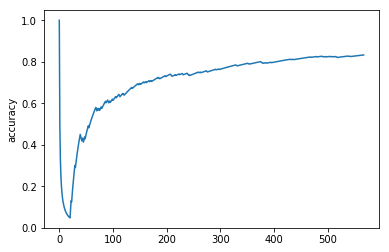

In [7]:
X_train,y_train = load_breast_cancer(return_X_y=True) 
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_train = np.c_[X_train, np.ones(len(X_train)) ] #add columns of 1's if you want

accuracies = forgetron(X_train, y_train, len(X_train), 10)

plt.plot(accuracies)
plt.ylabel('accuracy')
plt.show()

Adaptando el forgetrón para el mismo caso se observa una deficiencia. A pesar de que el comportamiento es similar, la tasa de crecimiento de la exactitud es notablemente menor y llega a un valor menor que el perceptrón tradicional. Por otra parte, el tiempo de ejecución es considerablemente mayor. Si bien, el algoritmo es similar, la memoria del forgetrón impide lograr mejor exactidud. Sin embargo depende del caso, ya que según [2], el perceptrón puede ser eficiente cuando se utiliza con kernels. Se podría mejorar el rendimiento de este buscando un $K$ adecuado.

### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%"  />

Ésto sería modelar el perceptrón como:
$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi}) $, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

Para buscar los límites de la función sigmoidal se ejecuta el siguiente código:

In [8]:
#Busqueda del límite superior
limit_reached = False
xi = 0

while(limit_reached == False):
    sig = 1/(1 + np.exp(-1 * xi))
    if(sig == 1):
        print("Limite superior: ", xi)
        limit_reached = True

    xi += 1

#Busqueda del límite inferior
limit_reached = False
xi = 0
while(limit_reached == False):
    sig = 1/(1 + np.exp(-1 * xi))
    if(sig == 0):
        print("Limite inferior: ", xi)
        limit_reached = True

    xi -= 1

Limite superior:  37
Limite inferior:  -710


Se obtiene que cuando $\xi$ tiene un valor de $37$, la función sigmoidal vale 1 y todos los valores superiores a este convergerán al mismo; por otra parte, cuando $\xi$ toma un valor de $-710$, la función vale 0 y todos los valores inferiores convergerán al mismo. Luego, la funciones se definen como:

In [9]:
def sigmoidal(xi):
    if xi <= -710:
        xi = -709
        
    elif xi >= 37:
        xi = 36
        
    return 1/(1 + np.exp(-1 * xi))

def g(x_i, w):
    return sigmoidal(np.dot(w, x_i))

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

In [10]:
#No se realiza ajuste para los límites del logaritmo ya que se hicieron en la sigmoidal.
def ell(y, x_i, w):
    g_xw = g(x_i, w)
    return -y * np.log(g_xw) - (1 - y) * np.log(1 - g_xw)

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

Para efectos de este entrenamiento, la función de pérdida está definida como:

$$
\ell(y, \sigma(\xi)) = -y\ln(\sigma(\xi)) - (1-y)\ln(1-\sigma(\xi))
$$

donde el bias está incluido en los pesos y $\xi$ se define como:

$$
\xi = \sum_j w_j \cdot x^{(i)}_j
$$

Calcular el gradiente de la Binary Cross Entropy implica derivar multiples veces con respecto a los pesos del modelo $w$. Para un peso particular $w_{l}$, se pueden calcular las siguientes derivadas:

$$
\frac{\partial \xi}{\partial w_{l}} = \frac{\partial \sum_j w_j \cdot x^{(i)}_j}{\partial w_{l}} = x_{l}^{(i)}
$$

$$
\frac{\partial \sigma(\xi)}{\partial w_{l}} = \sigma(\xi)(1-\sigma(\xi))*\frac{\partial \xi}{\partial w_{l}} = \sigma(\xi)(1-\sigma(\xi))*x_{l}^{(i)}
$$

$$
\frac{\partial \ln(\sigma(\xi))}{\partial w_{l}} = \frac{1}{\sigma(\xi)}*\frac{\partial \sigma(\xi)}{\partial w_{l}} = \frac{1}{\sigma(\xi)} * \sigma(\xi)(1-\sigma(\xi))*x_{l}^{(i)} = (1-\sigma(\xi))*x_{l}^{(i)}
$$


Luego, la derivada de la función de pérdida para un peso $w_{l}$ es:

$$
\frac{\partial \ell(y^{(i)}, \sigma(\xi))}{\partial w_{l}} = \sigma(\xi)(1-\sigma(\xi))*x_{l}^{(i)} * (\frac{-y^{(i)}}{\sigma(\xi)} + \frac{(1-y^{(i)})}{(1-\sigma(\xi))})
$$

Finalmente, el gradiente de la Binary Cross Entropy es el conjunto de las derivadas respecto a todos los pesos.

In [11]:
def gradient(x_i, w, y):
    #Se reserva espacio para almacenar el gradiente
    result = np.zeros(len(w))
    
    #Calculo de derivadas según cada peso
    for i in range(len(w)):
        ga = g(x_i, w)
        result[i] = ga * (1 - ga) * x_i[i] * ((-y/ga) + ((1 - y)/(1 - ga)))
    
    #Se retorna el conjunto de derivadas o gradiente
    return result

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

In [12]:
def perceptron_sgd(x, y, n, N):
    init_time = time()
    w = np.zeros(x[0].size)  
    correct = 0
    acc_arr = []
    losses = []
    
    mistakes = True
    while(mistakes):
        mistakes = False

        for i in range(N):
            if y[i] != f(x[i], w):
                w = (w.T - (n * gradient(x[i], w, y[i]))).T
                mistakes = True
            
            else:
                correct += 1
            
            acc_arr.append(correct/(i+1))
            l = ell(y[i], x[i], w)
            losses.append(l)
            
        #Comentar break para ejecutar el entrenamiento completo
        break
        
    end_time = time()
    print("Tiempo:", end_time - init_time, "[s]")
    return (acc_arr, losses)

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

Tiempo: 0.012963056564331055 [s]


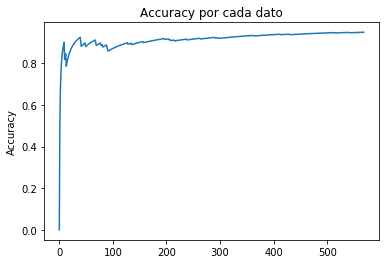

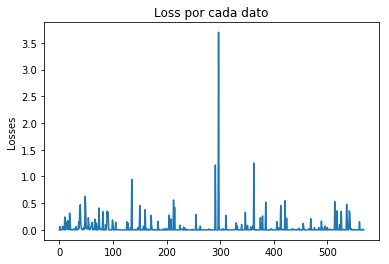

In [13]:
X_train,y_train = load_breast_cancer(return_X_y=True) 
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_train = np.c_[X_train, np.ones(len(X_train)) ] #add columns of 1's if you want

accuracies, losses = perceptron_sgd(X_train, y_train, 0.3, len(X_train))

plt.plot(accuracies)
plt.title('Accuracy por cada dato')
plt.ylabel('Accuracy')
plt.show()

plt.plot(losses)
plt.title('Loss por cada dato')
plt.ylabel('Losses')
plt.show()

En base a los resultados obtenidos por el perceptrón con Binary Cross Entropy se observa que el accuracy tiene un comportamiento bastante similar al del primer perceptrón, incluso logrando un valor final levemente superior. La ventaja que tiene el segundo perceptrón es que con la función de pérdida castiga levemente un error y el gradiente descendente permite actualizar los pesos hacia una dirección que pueda minimizarlo (es decir, aproximar el output a 0 en las siguientes iteraciones); esto se puede observar en la segunda figura, donde el valor del las pérdidas tiende a volver a cero continuamente, a excepción de algunos casos probablemente debido a las cotas impuestas para la sigmoidal. Respecto al tiempo, el segundo perceptrón tarda un poco más.

En conclusión, ambos algoritmos son bastante similar, solo que para el perceptrón tradicional hay casos en que se deben romper los empates mientras que el gradiente descendente permite ajustar la dirección en caso de un error. En este caso solamente se estudió una sola pasada por datos, sin embargo, para datos muy grandes y sin esta restricción, el segundo método podría ser mas conveniente ya que puede el entrenamiento se refina más rápido.

<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  